In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [180]:
path='/Users/hurrywish/Desktop/酒类数据.xlsx'
data=pd.read_excel(path)
data.head(10)

,ID,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,商品链接,日期,品牌
0,537013830676,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,单纯高粱酿造 精制包装 特色语录,NaN,67514.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白
1,525501233363,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,正宗牛栏山 地道北京味,NaN,26144.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,牛栏山
2,540011154689,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,NaN,NaN,25921.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,泸州老窖
3,43211682074,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,整箱原厂包装 见详情链接,满99元减10元,22575.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,红星
4,521710025064,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,不参与天猫超市任何优惠券活动,NaN,21535.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,洋河
5,536909908299,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白
6,536909908299,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0,14547,酒厂直营 正品保证 百城次日达,满189元送任意1件赠品（赠完即止）；满229元送任意1…,21178.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,江小白
7,43250741723,红星二锅头酒大二绿瓶56度 500ml*12白酒酒厂直供,139.0,4568,红星实惠口粮酒,NaN,21046.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,红星
8,43266652218,42度牛栏山二锅头陈酿500ml*12支 整箱装 白牛二,168.0,4218,正宗牛栏山 地道北京味 整箱正品,NaN,20908.0,https://chaoshi.detail.tmall.com/item.htm?id=4...,2018-02-27,牛栏山
9,535760560780,【天猫超市】五粮液股份公司 纳福彰显尊贵 精品级52度500mL白酒,49.0,534,NaN,NaN,20568.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-02-27,五粮液


In [181]:
data.columns,data.index

(Index(['ID', '商品名称', '价格（元）', '近30天销量（件）', '广告词', '促销活动', '评论数', '商品链接', '日期',
        '品牌'],
       dtype='object'),
 RangeIndex(start=0, stop=8141, step=1))

In [182]:
data1=data[['商品名称','价格（元）','近30天销量（件）','日期','品牌']]
data2=data1.drop(index=(data1[data1['价格（元）'].isnull()].index|data1[data1['价格（元）']<=0].index),axis=0)
data2=data2.drop_duplicates(keep='first')
data2['日期']=pd.to_datetime(data2['日期'])

In [183]:
data2['价格（元）'].describe()

count     8129.000000
mean       397.665819
std        639.910147
min          4.500000
25%         99.900000
50%        198.000000
75%        399.000000
max      11512.800000
Name: 价格（元）, dtype: float64

In [184]:
bins=[0,100,500,1000,3000,15000]
labels=['低档','中低档','中档','中高档','高档']
price_cats=pd.cut(data2['价格（元）'],bins=bins,labels=labels)
data2['档次']=price_cats
data2['销售总额（元）']=data2['价格（元）']*data['近30天销量（件）']
data2

,商品名称,价格（元）,近30天销量（件）,日期,品牌,档次,销售总额（元）
0,江小白品鉴酒更多优惠请见详情页非卖品请勿下单！,29.0,121,2018-02-27,江小白,低档,3509.0
1,牛栏山 46度二锅头500mL*12整箱（绿瓶）装 清香型,78.0,8027,2018-02-27,牛栏山,低档,626106.0
2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,2018-02-27,泸州老窖,低档,62320.0
3,红星二锅头酒大二绿瓶56度 500ml清香型白酒酒厂直供,13.0,8703,2018-02-27,红星,低档,113139.0
4,52度洋河海之蓝 480mlx2瓶 绵柔型白酒 猫超配送 酒厂直供,326.0,7165,2018-02-27,洋河,中低档,2335790.0
...,...,...,...,...,...,...,...
8136,【天猫超市】五粮液 绵柔尖庄 红标50度500ml 正品白酒 浓香白酒,69.0,8,2017-05-24,五粮液,低档,552.0
8137,【天猫超市】景芝 景芝老窖 46度500ml 浓香型白酒 山东名酒,29.0,16,2017-05-24,景芝,低档,464.0
8138,【天猫超市】53度茅台迎宾酒（2013款）500ml*6瓶整箱酒厂直供,408.0,1,2017-05-24,茅台,中低档,408.0
8139,【天猫超市】安达情闷倒驴45度白大闷500ml*12清香型白酒整箱装,108.0,1,2017-05-24,安达情,中低档,108.0


Text(0, 0.5, '销售数(千件)')

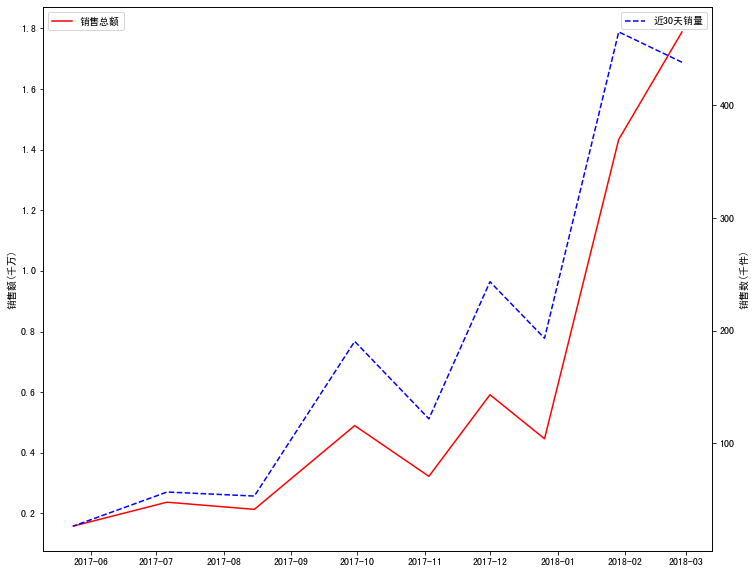

In [185]:
total_sales=data2.groupby('日期').sum().sort_index(ascending=False)
total_sales
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(111)
ax1.plot(total_sales['销售总额（元）'],color='r',ls='-',label='销售总额')
ax1.legend(loc='upper left')
ax1.set_yticklabels(np.round(np.arange(0,2,0.2),2))
ax1.set_ylabel(r'销售额(千万)')
ax2=ax1.twinx()
ax2.plot(total_sales['近30天销量（件）'],color='b',ls='--',label='近30天销量')
ax2.legend(loc='upper right')
ax2.set_yticklabels(np.round(np.arange(0,700,100),2))
ax2.set_ylabel(r'销售数(千件)')

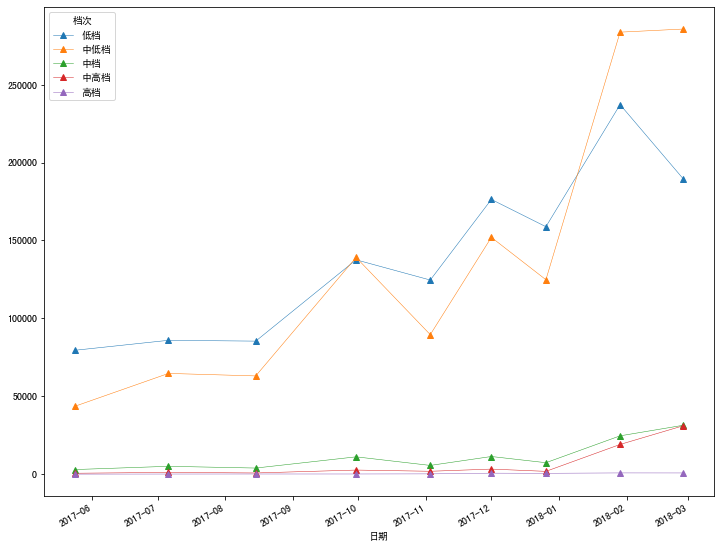

In [207]:
total_sales_class=data2.groupby(['日期','档次']).sum()
total_sales_class.unstack()['近30天销量（件）'].plot(marker='^',lw=0.5,figsize=(12,10))

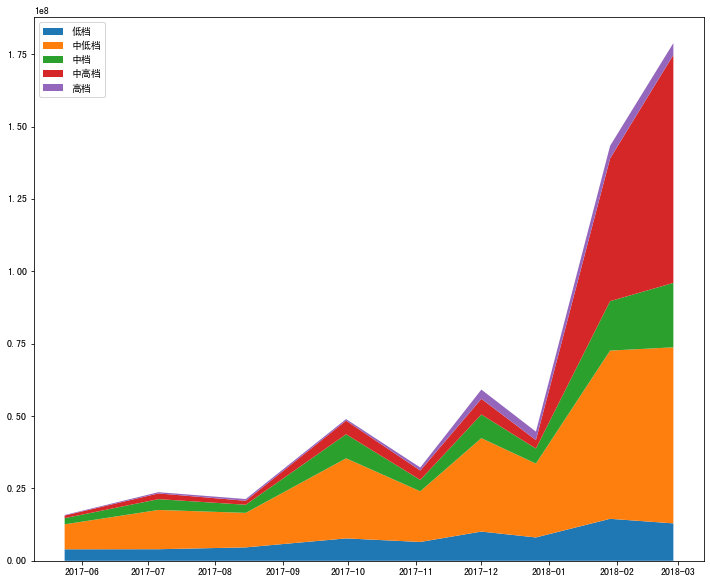

In [243]:
total_sales_class=data2.groupby(['日期','档次']).sum()
total_sales_1=total_sales_class.unstack()['销售总额（元）']
index=total_sales_1.index
low_class=total_sales_1['低档'].values
medlow_class=total_sales_1['中低档'].values
med_class=total_sales_1['中档'].values
medhigh_class=total_sales_1['中高档'].values
high_class=total_sales_1['高档'].values
plt.figure(figsize=(12,10))
plt.stackplot(index,low_class,medlow_class,med_class,medhigh_class,high_class,labels=['低档','中低档','中档','中高档','高档'])
plt.legend(loc='upper left')

档次                  低档         中低档           中档         中高档         高档
日期                                                                    
2017-05-24   3977114.9   8619964.6   2131019.80    905583.0   183132.0
2017-07-06   3999655.9  13562659.0   3732241.00   1976323.0   429569.0
2017-08-15   4637999.9  11916837.0   2804934.00   1373869.0   601351.0
2017-09-30   7736944.8  27663740.9   8314911.00   4685372.0   560529.0
2017-11-03   6507457.1  17503101.3   3932957.00   3230907.0  1058675.0
2017-12-01  10097201.7  32266526.4   8182016.60   5403269.0  3202832.0
2017-12-26   8068787.9  25512356.6   5209029.40   2908461.0  2922639.0
2018-01-29  14503004.6  58110524.3  17072492.60  49307406.8  4363171.0
2018-02-27  12928577.6  60813522.4  22263781.59  78745492.0  4084703.0


Text(0.5, 1.0, '各个档次销售总额')

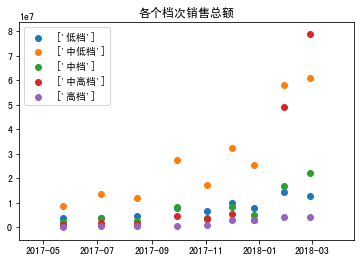

In [287]:
print(total_sales_1)
c_range=np.arange(0,9,1)
plt.scatter(x=total_sales_1.index,y=total_sales_1['低档'].values,label=['低档'])
plt.scatter(x=total_sales_1.index,y=total_sales_1['中低档'].values,label=['中低档'])
plt.scatter(x=total_sales_1.index,y=total_sales_1['中档'].values,label=['中档'])
plt.scatter(x=total_sales_1.index,y=total_sales_1['中高档'].values,label=['中高档'])
plt.scatter(x=total_sales_1.index,y=total_sales_1['高档'].values,label=['高档'])
plt.legend()
plt.title('各个档次销售总额')

In [249]:
plt.scatter?

In [282]:
np.arange(0,9,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [290]:
data_luzhou=data2[data2['品牌']=='泸州老窖']
data_luzhou

,商品名称,价格（元）,近30天销量（件）,日期,品牌,档次,销售总额（元）
2,泸州老窖 泸州原浆柔和 52度 500mL 白酒浓香型,20.0,3116,2018-02-27,泸州老窖,低档,62320.0
45,52度泸州老窖股份浓香源A6白酒整箱促销粮食酒,129.0,524,2018-02-27,泸州老窖,中低档,67596.0
58,泸州老窖特曲52度500ml* 2瓶浓香型白酒礼品礼袋装,420.0,2203,2018-02-27,泸州老窖,中低档,925260.0
74,泸州老窖特曲 52度 500mL浓香型 高度 白酒,218.0,1432,2018-02-27,泸州老窖,中低档,312176.0
75,泸州老窖 泸州原浆蓝色8 52度500mL*6白酒浓香型,188.0,2671,2018-02-27,泸州老窖,中低档,502148.0
...,...,...,...,...,...,...,...
8104,【天猫超市】泸州老窖 原浆喜庆装52度500ml*6瓶 整箱装高度白酒,99.9,218,2017-05-24,泸州老窖,低档,21778.2
8107,【天猫超市】泸州老窖股份52度双喜酒6/k 浓香型白酒整箱500ml*6,89.0,172,2017-05-24,泸州老窖,低档,15308.0
8112,【天猫超市】泸州老窖 窖藏原酿52度500ml高度白酒老窖酒厂自营,39.0,135,2017-05-24,泸州老窖,低档,5265.0
8122,【天猫超市】泸州老窖股份 52度双喜酒500ml/瓶 浓香型白酒婚庆,39.0,56,2017-05-24,泸州老窖,低档,2184.0


In [311]:
luzhou_class=data_luzhou.groupby(['日期','档次']).sum().unstack()
luzhou_class_latest=luzhou_class[luzhou_class.index=='2018-02-27']
luzhou_class_latest

价格（元）                                 近30天销量（件）               \
档次             低档     中低档      中档     中高档      高档        低档    中低档    中档   
日期                                                                         
2018-02-27  842.0  5308.0  2128.0  9252.0  8480.0      9834  12288  1532   

                       销售总额（元）                                             
档次           中高档  高档        低档        中低档         中档        中高档        高档  
日期                                                                         
2018-02-27  1713  56  585671.1  3060703.0  1062404.0  2576712.0  287440.0

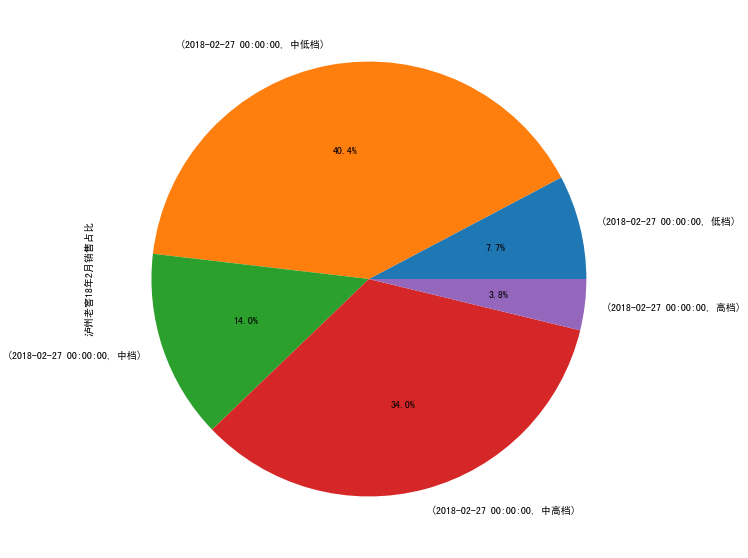

In [320]:
luzhou_class_latest['销售总额（元）'].stack().plot.pie(autopct='%1.1f%%',figsize=(12,10),label='泸州老窖18年2月销售占比')

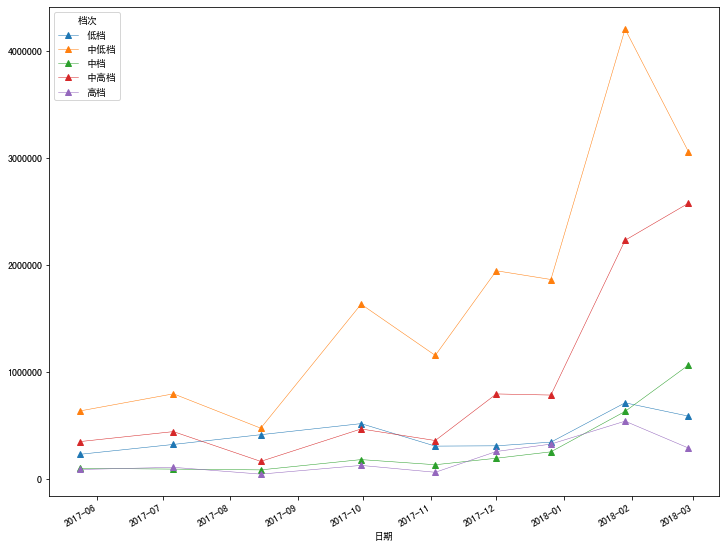

In [325]:
luzhou_class['销售总额（元）'].plot(figsize=(12,10),marker='^',lw=0.5)

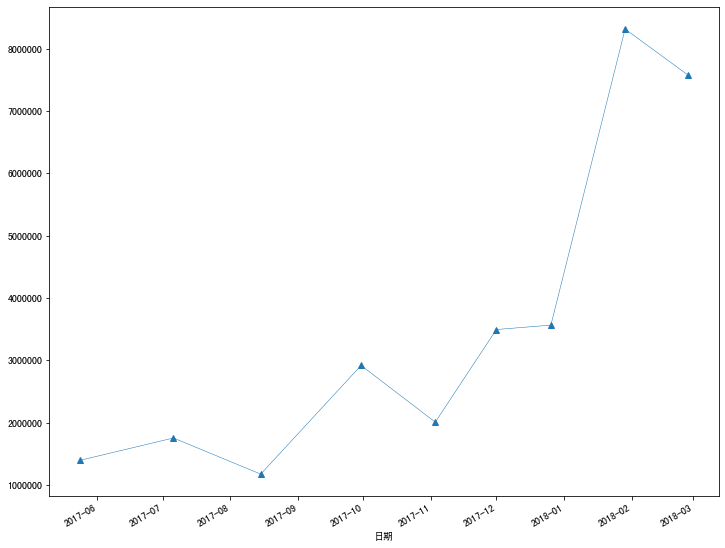

In [335]:
luzhou_class['销售总额（元）'].sum(1).plot(figsize=(12,10),marker='^',lw=0.5)

Index(['茅台', '洋河', '五粮液', '牛栏山', '泸州老窖'], dtype='object', name='品牌')
品牌
五粮液      83005473.2
泸州老窖     32189944.5
洋河       83199375.8
牛栏山      37939225.1
茅台      143502278.2
Name: 销售总额（元）, dtype: float64


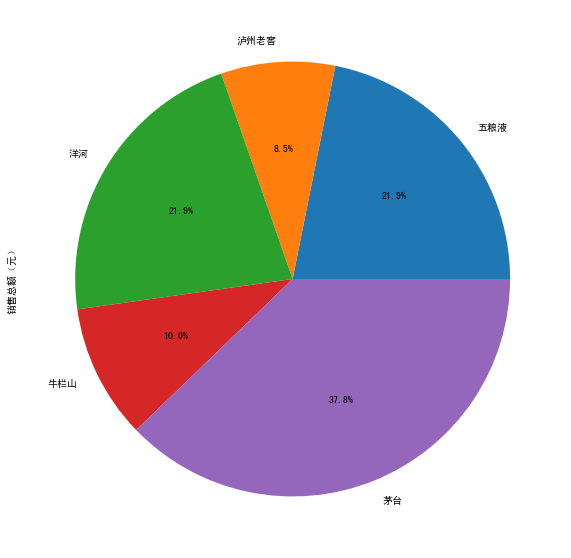

In [369]:
strong_brands=data2.groupby('品牌').sum().sort_values(by='销售总额（元）',ascending=False).index[:5]
print(strong_brands)
data10=data2[data2['品牌'].isin(strong_brands)]
data11=data10.groupby('品牌').sum()
data11['均价']=data11['销售总额（元）']/data11['近30天销量（件）']
print(data11['销售总额（元）'])
data11['销售总额（元）'].plot(kind='pie',autopct='%1.1f%%',figsize=(12,10))

In [374]:
data11=data10.groupby(['日期','品牌']).sum().unstack()[['近30天销量（件）','销售总额（元）']]
data11['']

近30天销量（件）                                 销售总额（元）             \
品牌               五粮液   泸州老窖     洋河    牛栏山     茅台         五粮液       泸州老窖   
日期                                                                        
2017-05-24     19860   8884  15037  16873   6202   2403529.4  1392681.0   
2017-07-06     16767  12188  24197  23801   8932   2810381.4  1752764.7   
2017-08-15     27701   9883  12843  20921   8344   4040369.9  1172931.3   
2017-09-30     59453  18412  25895  41326  18938   9826128.1  2917507.8   
2017-11-03     33421  14867  20149  39557  17248   5536315.1  2007141.7   
2017-12-01     55022  17996  37046  58108  25847   9992031.7  3493521.3   
2017-12-26     43762  19699  23362  48133  21771   8005198.6  3564244.7   
2018-01-29    129861  38441  55292  70580  50515  22309184.2  8316221.9   
2018-02-27    102742  25423  69234  65541  69413  18082334.8  7572930.1   

                                               
品牌                  洋河        牛栏山          茅台  
日期                                             
2017-05-24   2703185.0  1371424.8   1310305.3  
2017-07-06   4458644.0  1985425.8   1943633.8  
2017-08-15   2617063.0  1832194.7   1716167.9  
2017-09-30   7381251.0  4202234.6   4549465.9  
2017-11-03   4377386.0  3438591.5   3768892.6  
2017-12-01  10940932.0  5221546.3   5424300.2  
2017-12-26   5832053.0  4547299.5   4196015.3  
2018-01-29  18973739.0  6846134.8  46731241.1  
2018-02-27  25915122.8  8494373.1  73862256.1

In [410]:
data11['销售总额（元）']['五粮液']
growth_rate_dict=dict()
for i in strong_brands:
    growth_rate_list=list()
    for j in range(0,len(data11)-1,1):
        sales_this_month=data11['销售总额（元）'][i].iloc[j]
        sales_last_month=data11['销售总额（元）'][i].iloc[j+1]
        growth_rate=(sales_this_month-sales_last_month)/sales_last_month*100
        growth_rate=np.round(growth_rate,2)
        growth_rate_list.append(growth_rate)
    growth_rate_list.append(np.nan)
    growth_rate_dict[i]=growth_rate_list
    
           
            

               茅台     洋河    五粮液    牛栏山   泸州老窖
日期                                           
2017-05-24 -32.58 -39.37 -14.48 -30.93 -20.54
2017-07-06  13.25  70.37 -30.44   8.36  49.43
2017-08-15 -62.28 -64.54 -58.88 -56.40 -59.80
2017-09-30  20.71  68.62  77.48  22.21  45.36
2017-11-03 -30.52 -59.99 -44.59 -34.15 -42.55
2017-12-01  29.27  87.60  24.82  14.83  -1.98
2017-12-26 -91.02 -69.26 -64.12 -33.58 -57.14
2018-01-29 -36.73 -26.79  23.38 -19.40   9.82
2018-02-27    NaN    NaN    NaN    NaN    NaN


茅台     -23.73750
洋河      -4.17000
五粮液    -10.85375
牛栏山    -16.13250
泸州老窖    -9.67500
dtype: float64

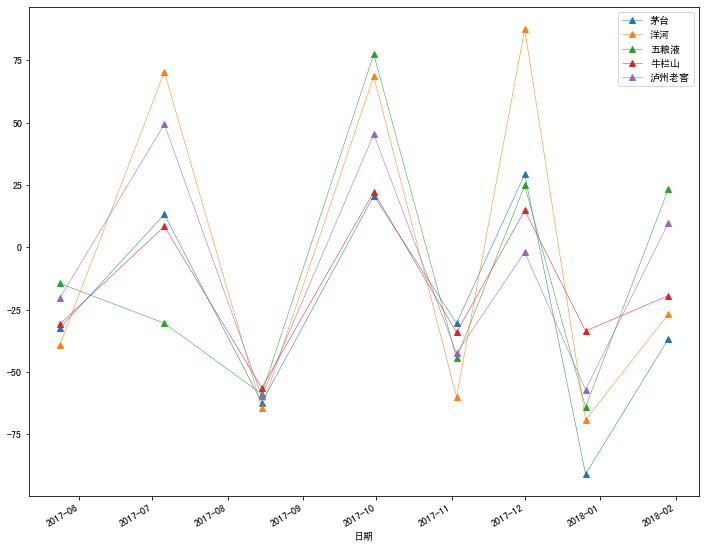

In [417]:
growth_rate_pd=pd.DataFrame(growth_rate_dict,index=data11.index)
print(growth_rate_pd)
growth_rate_pd.plot(figsize=(12,10),marker='^',lw=0.5)
growth_rate_pd.mean()